# Lecture 2 - Newton's Method

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from colorsys import hls_to_rgb

In [12]:
def normal(x, min_max):
    return (x - min_max[0]) / (min_max[1] - min_max[0])

Notice we can approximate the root of a function, $f(x)$, given an initial guess, $x_0$.  We then use the tangent line approximation to find the root of that line, $x_1$.  We then keep doing that until we can get $f(x^*) = 0 + \epsilon$, such that $\epsilon$ is a suitable tolerance, and $x^*$ is the found root. 

We start with the tangent line approximation of $f(x)$ given $x_0$:
$$y - f(x_0) = f'(x_0)(x - x_0)$$

The root of this equation, $x_1$, is found:
$$0 - f(x_0) = f'(x_0)(x_1 - x_0) \qquad \rightarrow \qquad x_1 = \frac{-f(x_0)}{f'(x_0)} + x_0$$

We can now generalize it to be:
$$0 - f(x_n) = f'(x_n)(x_{n+1} - x_n) \qquad \rightarrow \qquad x_{n+1} = \frac{-f(x_n)}{f'(x_n)} + x_n$$

In [13]:
def newtons_method_root_finder(x0, f, fp, tol, x_range, xlim=None, ylim=None, initial_plot=True):
    x_vals = np.linspace(x_range[0], x_range[1], 10_000)
    if initial_plot:
        y_vals = f(x_vals)
        plt.plot(x_vals, y_vals, 'r-')
        plt.grid()

        if xlim:
            plt.xlim(xlim[0], xlim[1])
        if ylim:
            plt.ylim(ylim[0], ylim[1])

    y_vals = fp(x0) * (x_vals - x0) + f(x0)
    plt.plot(x_vals, y_vals, '--', color=hls_to_rgb(1 - normal(x0, x_range), 0.5, 0.8))

    x1 = (-f(x0) / fp(x0)) + x0
    if np.abs(x1 - x0) <= tol:
        return x1

    return newtons_method_root_finder(x1, f, fp, tol, x_range, xlim=None, ylim=None, initial_plot=False)

0.0009765625

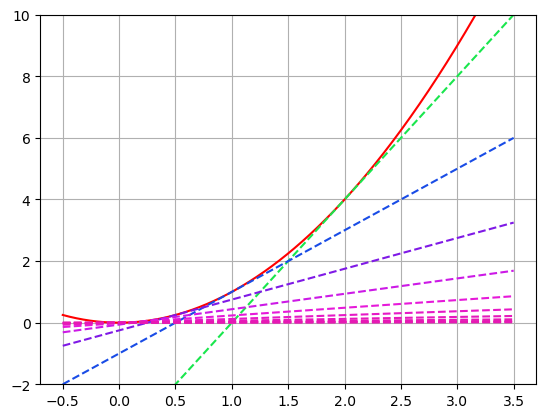

In [14]:
newtons_method_root_finder(2, lambda x: x**2, lambda x: 2 * x, 1e-3, (-.5, 3.5), None, (-2, 10))

2.5000000464611474

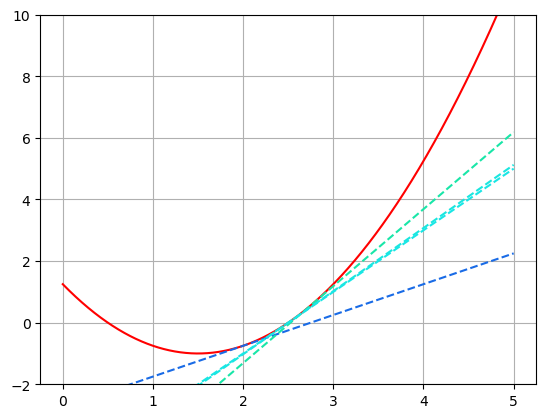

In [15]:
newtons_method_root_finder(2, lambda x: (x - 0.5) * (x - 2.5), lambda x: 2 * x - (0.5 + 2.5), 1e-3, (0, 5), None, (-2, 10))